In [1]:
import numpy as np
from scipy.stats import t, norm
from sif.kernels import SquaredExponentialKernel, MaternKernel
from sif.models import StudentTProcess, GaussianProcess

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Create random data.

In [3]:
X = np.random.normal(size=(15, 1))
y = np.random.normal(np.cos(3.*X) / (np.abs(X) + 1.), 0.2)
X_pred = np.atleast_2d(np.linspace(-3., 3., num=500)).T

Create the Student-t process object. As a point of comparison, we will also show a Gaussian process interpolation of the same data.

In [4]:
nu = 3.
stp = StudentTProcess(SquaredExponentialKernel(), 1., nu)
stp.fit(X, y)

In [5]:
gp = GaussianProcess(SquaredExponentialKernel(), 1.)
gp.fit(X, y)

Now we will produce the posterior expectation and variance of the Student-t process under a fixed hyperparameter configuration. In this section, we'll also draw samples from the predictive posterior distribution.

In [11]:
n_samples = 100
stp_samples = stp.sample(X_pred, n_samples)
gp_samples = gp.sample(X_pred, n_samples)

Visualize how well the samples conform to the expectation and variance characterization of the posterior.

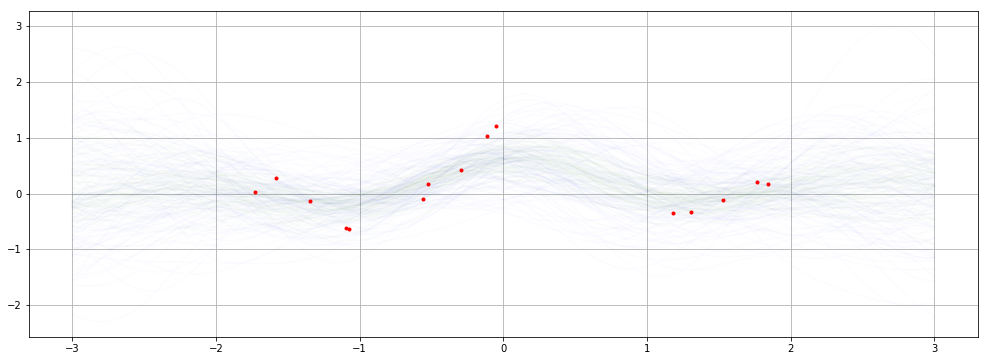

In [13]:
plt.figure(figsize=(17, 6))
# plt.plot(X_pred.ravel(), mean_pred.ravel(), "b-")
# plt.plot(X_pred.ravel(), t.ppf(0.975, nu, mean_pred, std_pred), "b--")
# plt.plot(X_pred.ravel(), t.ppf(0.025, nu, mean_pred, std_pred), "b--")
for i in range(n_samples):
    plt.plot(X_pred.ravel(), stp_samples[i], "g-", alpha=1. / 100)
    plt.plot(X_pred.ravel(), gp_samples[i], "b-", alpha=1. / 100)
plt.plot(X.ravel(), y.ravel(), "r.")
plt.grid()
plt.show()